### CS229 Problem Set #1

# CS 229, Public Course

## Problem Set #1: Supervised Learning

1. **Newton's method** for computing least squares

In this problem, we will prove that if we use **Newton’s method to solve the least squares optimization problem**, then **we only need one iteration to converge** to $\theta^*$.

> (a) Find the ***Hessian*** of the **cost function** $$J(\theta) = \frac{1}{2} \sum_{i=1}^m (\theta^T x^{(i)} − y^{(i)})^2 $$
>
> (b) Show that the first iteration of Newton’s method gives us $$\theta^* = ( X^T X )^{-1} X^T \vec{y}$$
> **the solution** to our least squares problem.

(a) Hessian of **cost function** $J(\theta)$

$$J(\theta) = \frac{1}{2} \sum_{i=1}^m (\theta^T x^{(i)} − y^{(i)})^2 =$$

matrix form:

$$= \frac{1}{2} \left( X\theta - y \right)^T \left( X\theta - y \right)$$

expand square:

$$= \frac{1}{2} \left( \theta^T X^T X \theta - \theta^T X^T y - y^T X \theta + y^T y \right) $$



$\DeclareMathOperator{\tr}{tr\,}$

because $J(\theta) \in R \implies \text{trace}\left( J(\theta)\right) = J(\theta)$

> $$J(\theta) = \frac{1}{2} \tr \left( \theta^T X^T X \theta - \theta^T X^T y - y^T X \theta + y^T y \right) $$

Matrix of first derivatives:

> $$\nabla J(\theta) = \nabla \frac{1}{2} \tr \left( \theta^T X^T X \theta - \theta^T X^T y - y^T X \theta + y^T y \right) $$

> $$= \frac{1}{2} \left(\nabla \tr ( \theta^T X^T X \theta ) - \nabla \tr (\theta^T X^T y) - \nabla \tr (y^T X \theta) + \nabla \tr (y^T y) \right) $$


Solving in parts:

> `i.` $\nabla \tr ( \theta^T X^T X \theta )$
>
> `ii.` $\nabla \tr (\theta^T X^T y)$
>
> `iii.` $\nabla \tr (y^T X \theta)$
>
> `iv.` $\nabla \tr (y^T y)$

`i.` $\nabla_\theta \tr ( \theta^T X^T X \theta )$

**Prop:**

> $\tr{ABC} = \tr CAB = \tr BCA$

$$\tr( \theta^T X^T X \theta ) = \tr ( \theta \theta^T X^T X )$$

$$\nabla_\theta \tr( \theta^T X^T X \theta ) = \nabla_\theta \tr ( \theta \theta^T X^T X )$$

$$$$

**Prop:**

> $\nabla _A \tr ABA^TC = CAB + C^TAB^T$

 $$= \nabla_\theta \tr ( \theta I \theta^T X^T X )$$

> where
>
> $A = \theta$
> 
> $B = I$
> 
> $C = X^TX$

$$= \tr ( \theta \ \  I \ \  \theta^T \ \  X^T X )$$

using prop:

 $$= X^TX \theta I + (X^TX)^T \theta I^T$$

 $$= X^TX \theta + X^TX \theta$$

> $$\nabla \tr ( \theta^T X^T X \theta ) = 2 X^TX \theta $$

`iii.` $\nabla_\theta \tr (y^T X \theta) = $

Using prop of permutation from before:

$$= \nabla_\theta \tr (\theta y^T X )$$

**Prop:**
> $\nabla_A \tr A B = B^T$

> where, if
>
> $A = \theta$
>
> $B = y^T X$

then:

$$= \left( y^T X \right)^T$$

> $$ \nabla_\theta \tr (y^T X \theta) =  X^T y $$

`ii.` $$\nabla_\theta \tr (\theta^T X^T y) =$$

**Prop:**

> $\tr A = \tr A^T$

$$= \nabla_\theta \tr (\theta^T X^T y)^T$$

$$= \nabla_\theta \tr (y^T X \theta)$$

Which is the same as `iii.`

> $$\nabla_\theta \tr (\theta^T X^T y) = X^T y$$

`iv.` Because $y$ does not depends on the parameters $\theta$

> $$\nabla_\theta \tr (y^T y) = 0$$



From before:

> $$= \frac{1}{2} \left(\nabla \tr ( \theta^T X^T X \theta ) - \nabla \tr (\theta^T X^T y) - \nabla \tr (y^T X \theta) + \nabla \tr (y^T y) \right) $$

Putting all `i-iv` together:

$$= \frac{1}{2} \left( 2 X^T X \theta - X^T y - X^T y \right)$$

$$= X^T X \theta - X^T y$$

> |Gradient of loss|
> |-|
> |$$\large{\nabla_\theta J(\theta) = X^T \left( X \theta - y \right)}$$|

---

We need the second derivatives for the Hessian.

**Prop:**
> if $y = A x $
>
> with $y \in R^{m \times 1}, A \in R^{m \times n}, x \in R^{n\times1}$
>
> then $\frac{\partial}{\partial x} y = A$

**Proof:**
> $\forall i \in [1,m]$
>
> $$y_i = \sum_{k=1}^n a_{ik} . x_k$$
>
>$\forall j \in [1,n]$
>
> $$\frac{\partial}{\partial x_j} y_i = \frac{\partial}{\partial x_j} \sum_{k=1}^n a_{ik} . x_k$$
>
> $$= \sum_{k=1}^n a_{ik} . \mathbb{1}\{j=k \}$$
>
> $$\frac{\partial}{\partial x_j} y_i = a_{ij}$$

From before:

$$\nabla_\theta J(\theta) = X^T X \theta - X^T y$$

Using prop for taking derivatives:

>|Solution:|
>|-|
>|$$\boxed{\large{\mathcal{H}_\theta J(\theta) = X^T X}}$$|

where:

$$X^T X = \begin{bmatrix}
    \sum_{j=1}^n (x_j^{(1)})^2 \\
    \sum_{j=1}^n (x_j^{(2)})^2 \\
    \vdots \\
    \sum_{j=1}^n (x_j^{(m)})^2
\end{bmatrix} \in R^{m}$$

> **(b)** Show that the first iteration of Newton’s method gives us
>
> $$\theta^* = ( X^T X )^{-1} X^T \vec{y}$$
>
> **the solution** to our least squares problem.

From **(a)**:

$$\nabla_\theta J(\theta) = X^T X \theta - X^T y$$

Because $J(\theta)$ is quadratic, there are absolutes guarantees that it has **one and only one critical point**, which is going to be the **minimum**.

if we set 

$$\nabla_\theta J(\theta) = 0$$

we'll find the **parameters $\theta^*$ that minimize the cost function** $J(\theta)$

$$X^T X \theta - X^T y = 0$$

$$X^T X \theta = X^T y$$

$$(X^T X)^{-1}(X^T X) \ \theta = (X^T X)^{-1} X^T y$$

> |Solution:|
> |-|
> |$$\boxed{\large{\theta^* = (X^T X)^{-1} X^T y}}$$|

**Proof** using **Newton's method**

One iteration of Newton's method:

$$\theta^{(t+1)} = \theta^{(t)} - H^{-1} \nabla_\theta J(\theta)$$

From before

> $\mathcal{H}_\theta J(\theta) = X^T X$
>
> $\nabla_\theta J(\theta) = X^T X \theta - X^T y$

Replacing:

$$\theta^{(t+1)} = \theta^{(t)} - ((X^T X)^{-1} (X^T X \theta^{(t)} - X^T y)) $$

Distribution:

$$\theta^{(t+1)} = \theta^{(t)} - (X^T X)^{-1} (X^T X \theta^{(t)}) + (X^T X)^{-1} (X^T y) $$

Simplifying that identity:

$$\theta^{(t+1)} = \theta^{(t)} - \theta^{(t)} + (X^T X)^{-1} (X^T y) $$

> |Solution:|
> |-|
> |$$\boxed{\large{\theta^{(t+1)} = (X^T X)^{-1} X^T y}}$$|

Notice that $\theta^{(t)}$ can be **anything** to begin with, because it's simplified by $\nabla_{\theta^{(t)}} J(\theta^{(t)})$.

**More general:**

> ***At any time $t$, Newton's method will find the optimal $\theta^*$ in only one step.***

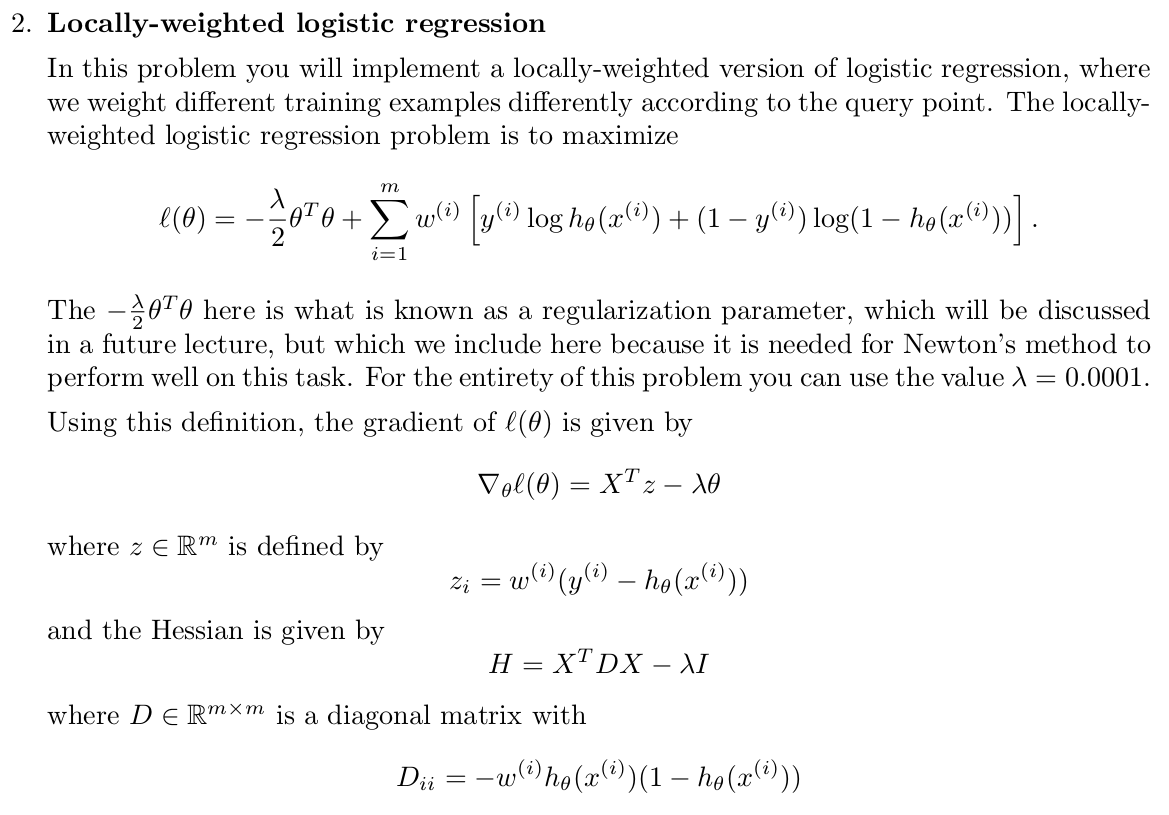

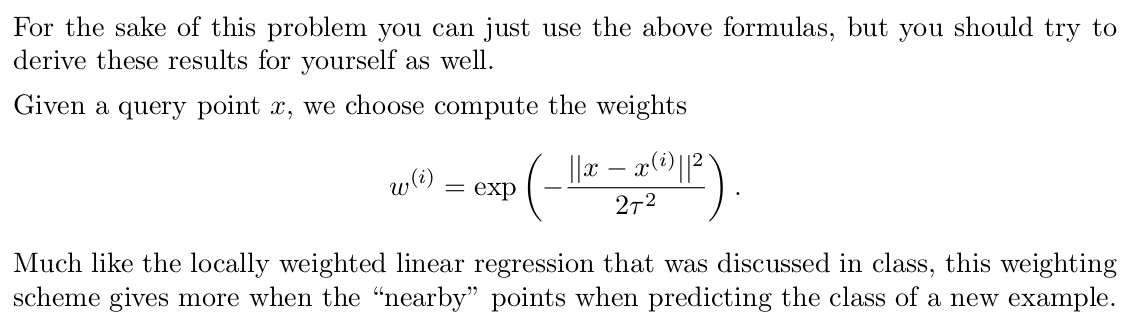

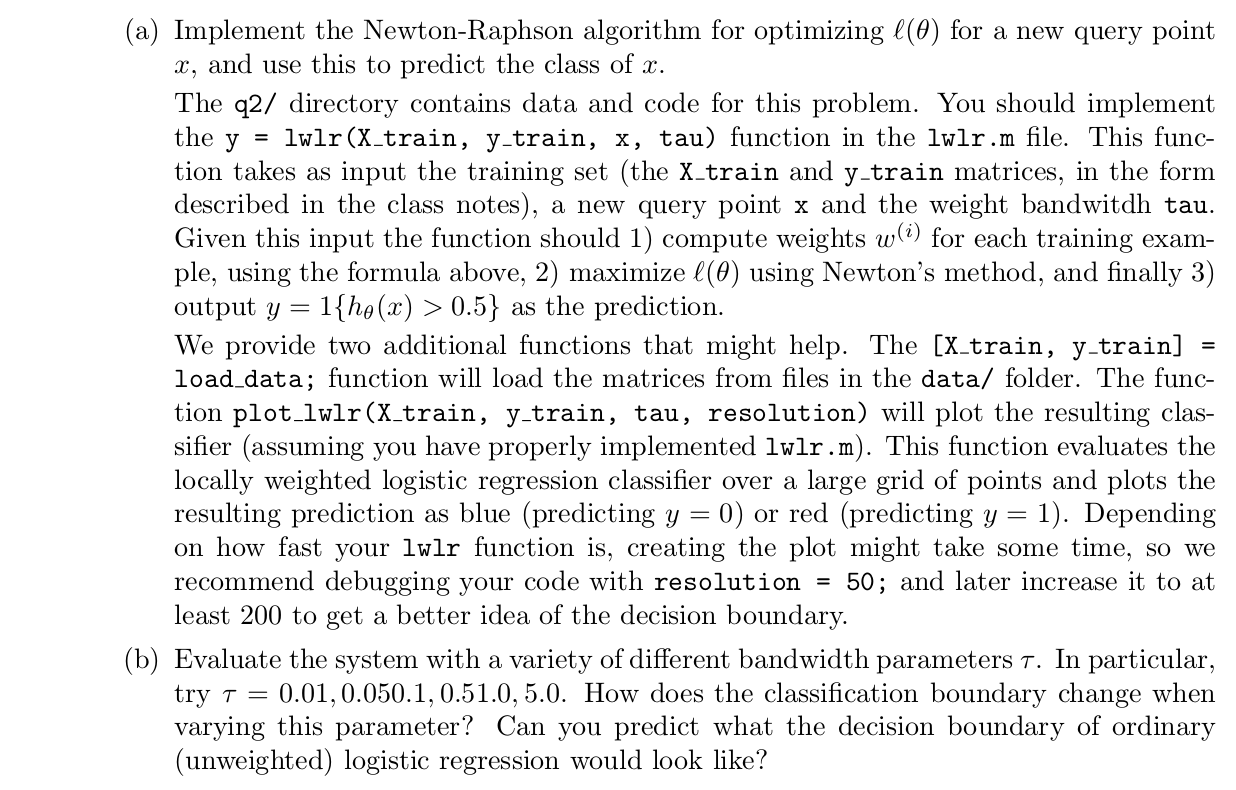

In [33]:
import numpy as np

def load_data():
    x = np.loadtxt('./ps1-q2/data/x.dat')
    y = np.loadtxt('./ps1-q2/data/y.dat')
    print('x data loaded with shape {}'.format(x.shape))
    print('y data loaded with shape {}'.format(y.shape))
    return x,y
x,y = load_data()

x data loaded with shape (69, 2)
y data loaded with shape (69,)


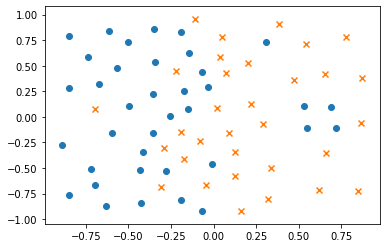

In [32]:
import matplotlib.pyplot as plt
plt.scatter(x[y==0][:,0], x[y==0][:,1], marker='o')
plt.scatter(x[y==1][:,0], x[y==1][:,1], marker='x')
plt.show()

In [42]:
def locally_weighted_logistic_regression(X_train, y_train, x, tau):
    #H = np.matmul(np.transpose(X_train), X_train)
    #iH = np.linalg.inv(H)
    #Xty = np.matmul(np.transpose(X_train), y_train)
    #np.matmul(iH, Xty)
    m = len(y)
    for i in range(m):
        
    return 

locally_weighted_logistic_regression(x,y, 1, 0.0001)

array([ 0.41840837, -0.01538987])

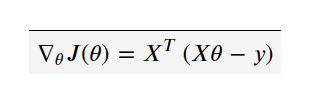